### **INITIALIZATION**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/PIE')
import MathFunctions
import SimulationFunctions

In [3]:
from math import  *


class Parameters:
    '''
    This class all basic and initial parameters to run the simulation.
    Attention to update the data according to the information and technical characteristics of the components used
    '''
    
    ##Car Features
    Car_length = 0.4      #meters
    Car_width = 0.19      #meters
    Car_maxspeed = 0.6
    Car_minspeed = 0.18 
    Car_speed = 2#m/s
    radius_margin = 0.01         #Safety margin for vehicle radius (meters)
    Car_radius =sqrt((Car_length/2)**2+(Car_width/2)**2) + radius_margin #Radius of the vehicle. A circle is created with the "car inside" so that nothing goes beyond that circle. 
    Max_acceleration = 0.5
    Max_CurvatureRadious = 30
    Min_CurvatureRadious = 1

    #LIDAR Features
    Lidar_steps=360              #Numbers of data that LIDAR receives in one complete turn
    Lidar_delta=1/10          #Time taken by the sensor to read the N points
    Lidar_stepsize = 360/Lidar_steps       #Angled representation of each LIDAR step
    Lidar_maxdistance = 8     #Maximum distance that the handle can capture an object(meters)

    epsilonmax=45
    tsb=0.1  

    
parameters = Parameters()


### **Env**

In [7]:
#Enviroment
import numpy as np
import matplotlib.pyplot as plt
class TrainCar():

    def __init__(self):

        #Variables used only for simulation
        self.Env, self.Position, self.Orientation = SimulationFunctions.MakeEnv()
        self.ep =0;
        #State variables
        self.Speed = 0.6#m/s
        self.inverse_Radious = 0
        self.LidarData = SimulationFunctions.GetLidarSimulation(self.Env,self.Position,self.Orientation)

        self.done = False
        self.reward = 0
        self.hit, self.miss = 0, 0
        self.Step = 0
        self.red = 0

        self.maxrw = -50

    def run_frame(self, c_rw):
        temp = 0



        


    # ------------------------ AI control ------------------------

    def reset(self):

        #Variables used only for simulation
        self.Env, self.Position, self.Orientation = SimulationFunctions.MakeEnv()
        self.inverse_Radious = 0
        self.Speed =0.6#m/s
        self.LidarData = SimulationFunctions.GetLidarSimulation(self.Env,self.Position,self.Orientation)

        #return state

        return self.LidarData, self.Speed,

    def GetCar(self):
      return [self.Position[0]],[self.Position[1]],[self.Orientation]

    def step(self):
        self.done = 0 
        self.inverse_Radious = 0

        r_30 = 0
        r_60 = 0
        r_90 = 0

        l_30 = 0
        l_60 = 0
        l_90 = 0
        for i in range(len(self.LidarData)-1):

          if (i < 30):
              l_30 += self.LidarData[i][1]/30
          elif (i < 60):
              l_60 += self.LidarData[i][1]/30
          elif ( i < 90):
              l_90 += self.LidarData[i][1]/30
          
          if (i > 269 and i < 300):
            r_90 += self.LidarData[i][1]/30
          elif (i > 299 and i < 330):
            r_60 += self.LidarData[i][1]/30
          elif (i > 229 ):
            r_30 += self.LidarData[i][1]/30

        if (r_90 > l_90):
          self.inverse_Radious += max(-1 , l_90-r_90)
        else:
          self.inverse_Radious += min(1 , l_90-r_90)

        if (r_60 > l_60):
          self.inverse_Radious += max(-1 , (l_60-r_60)*0.2)
        else:
          self.inverse_Radious += min(1 , (l_60-r_60)*0.2)
        
        if (r_30 > l_30):
          self.inverse_Radious += max(-1 , (l_60-r_60)*0.01)
        else:
          self.inverse_Radious += min(1 , (l_60-r_60)*0.01)

        self.inverse_Radious = min(self.inverse_Radious,1)
        self.inverse_Radious = max(self.inverse_Radious,-1)
        print(self.inverse_Radious)
        for i in range(len(self.LidarData)):
            if self.LidarData[i][1] <= parameters.Car_radius:
                self.done = True
        # Car moving
        NewPosition, NewOrientation, Angle_Servo = SimulationFunctions.UpdateCar(self.inverse_Radious, self.Speed, self.Position,self.Orientation)


        self.Orientation = NewOrientation
        self.Position = NewPosition

        #Updating LIDAR
        self.LidarData = SimulationFunctions.GetLidarSimulation(self.Env,self.Position,self.Orientation)
        
        
        return self.LidarData, self.Speed, self.done




### **SIMULATION**

In [5]:


def Simulate(times):

    Result = [[],[],[]]


    env = TrainCar()
    old_state, i = env.reset(), 0
    done = False

    while not done and i < times:

      r,old_state, done = env.step()

      Position = [[],[]]
      Position[0],Position[1],Orientation = env.GetCar()

      Result[0] += Position[0]
      Result[1] += Position[1]
      Result[2] += Orientation

      i += 1
          

    return Result
    




1.3138280122007613
1.0529788221552152
0.7749306764375099
0.42025244974886883
0.054049055612263204
-0.12584483249293776
-0.2439605032571624
-0.33434538425329774
-0.29490109527466823
-0.3245691893126409
-0.3474470928844769
-0.360981497927354
-0.33434324237339336
-0.3303650816006485
-0.3161107250725396
-0.26816614388924276
-0.2607921364781269
-0.220958751832997
-0.17455988308499318
-0.14513765117114985
-0.1108515644038231
-0.07307646041087236
-0.05556327947774027
-0.014017193001170493
0.004706634632258883
0.02275754498179951
0.03944617770302746
0.03172589716991549
0.04537035845034145
0.05688391636138222
0.043571063033285395
0.05119204247461413
0.05661257235147581
0.03748076727245823
0.03957805152636374
0.040073720542009174
0.016842567197373915
0.015706120983821997
0.013985444364123781
0.011763015065629186
0.00913876948418071
0.006225740643797484
0.003145299271044355
2.219423365682483e-05
-0.0030204090834022026
-0.02184084222667821
-0.05483646154571224
-0.049352260646173284
-0.078308733106

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


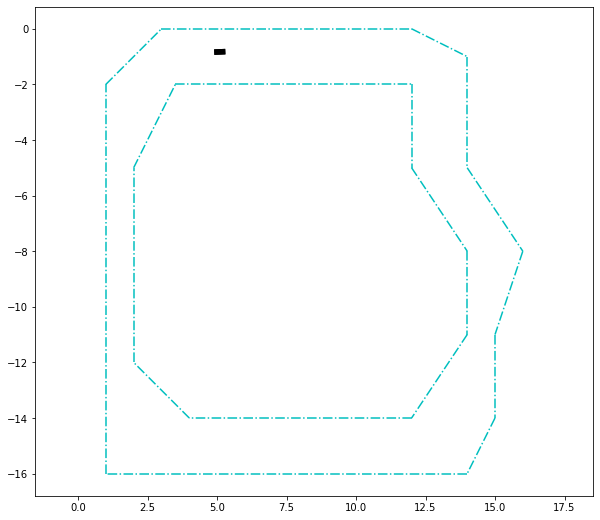

In [6]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import animation
from IPython.display import HTML




#making all the enviroment
RaceTrack ,l ,o = SimulationFunctions.MakeEnv() 


#simulation
Car1x,Car1y,Car1ori = Simulate(400)
print("END Simulation")
    
#Plotting
fig = plt.figure(figsize=(10, 9))
plt.axis('equal')

#Racetrack
i =0
n=len(RaceTrack)
while i<n:
    nn=len(RaceTrack[i])
    j=0
    while j<(nn-1):
        plt.plot([RaceTrack[i][j][0],RaceTrack[i][j+1][0]],[RaceTrack[i][j][1],RaceTrack[i][j+1][1]],"c-.")
        j+=1
    i+=1
    
    
    
ax = fig.add_subplot(111)


patch1 = patches.Rectangle((0, 0), 0, 0, fc='k')
point1, = ax.plot([], [],'ko')

def init():
    ax.add_patch(patch1)
    point1.set_data([], [])
    return (patch1,point1)

def animate(i):
    patch1.set_width(0.4)
    patch1.set_height(0.2)
    patch1.set_xy([Car1x[i], Car1y[i]])
    patch1.angle = Car1ori[i]
    
    return (patch1,point1)

anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(Car1x),
                               interval=10,
                               blit=True)


HTML(anim.to_html5_video())
    
    
    